In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Sample trainig data
food_qual = np.arange(0,11,1)   # Generate array with steps of 1
serv_qual = np.arange(0,11,1)
tip = np.arange(0,26,1)
#food_qual.shape[:]
serv_qual.shape[:]

(11,)

In [3]:
# Membership Function to define participation
food_qual_lo = fuzz.trimf(food_qual,[0,0,5])
food_qual_mid = fuzz.trimf(food_qual,[0,5,10])
food_qual_hi = fuzz.trimf(food_qual,[5,10,10])

#print(food_qual_hi.shape[:])
serv_qual_lo = fuzz.trimf(serv_qual,[0,0,5])
serv_qual_mid = fuzz.trimf(serv_qual,[0,5,10])
serv_qual_hi = fuzz.trimf(serv_qual,[5,10,10])
print(serv_qual_lo.shape)

tip_lo = fuzz.trimf(tip,[0,0,13])
tip_mid = fuzz.trimf(tip,[0,13,25])
tip_hi = fuzz.trimf(tip,[13,25,25])
print(tip_lo.shape[:])

(11,)
(26,)


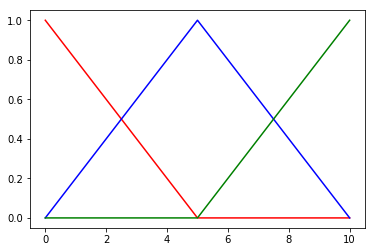

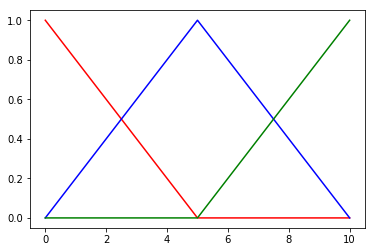

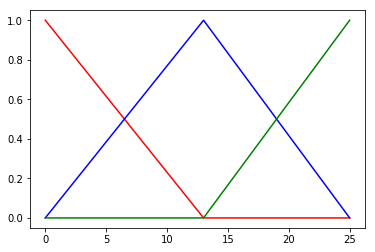

In [4]:
plt.plot(food_qual,food_qual_lo,'r')
plt.plot(food_qual,food_qual_mid,'b')
plt.plot(food_qual,food_qual_hi,'g')
plt.show()

plt.plot(serv_qual,serv_qual_lo,'r')
plt.plot(serv_qual,serv_qual_mid,'b')
plt.plot(serv_qual,serv_qual_hi,'g')
plt.show()

plt.plot(tip,tip_lo,'r')
plt.plot(tip,tip_mid,'b')
plt.plot(tip,tip_hi,'g')
plt.show()

0.4
0.6
0.0
--------------
0.0
0.03999999999999987
0.9600000000000002
--------------
0.4
[1.         0.92307692 0.84615385 0.76923077 0.69230769 0.61538462
 0.53846154 0.46153846 0.38461538 0.30769231 0.23076923 0.15384615
 0.07692308 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.4        0.4        0.4        0.4        0.4        0.4
 0.4        0.4        0.38461538 0.30769231 0.23076923 0.15384615
 0.07692308 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


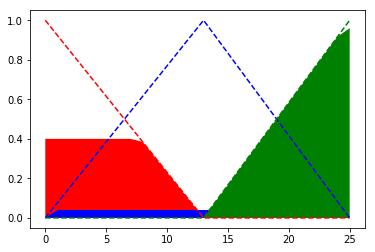

In [5]:
# Activation Of our Fuzzy Membership Function
# i.e; given a new food quality value we need to
#predict the tip

# So given a new food quality =3 & Service Quality =9.8 we need to predict the tip to offer
# Therefore we find the degree of membership of 3 and 9.8 value in each of our classes using fuzz.interp_membership()
food_qual_level_lo = fuzz.interp_membership(food_qual,food_qual_lo,3)
food_qual_level_mid = fuzz.interp_membership(food_qual,food_qual_mid,3)
food_qual_level_hi = fuzz.interp_membership(food_qual,food_qual_hi,3)

print(food_qual_level_lo)
print(food_qual_level_mid)
print(food_qual_level_hi)

serv_qual_level_lo = fuzz.interp_membership(serv_qual,serv_qual_lo,9.8)
serv_qual_level_mid = fuzz.interp_membership(serv_qual,serv_qual_mid,9.8)
serv_qual_level_hi = fuzz.interp_membership(serv_qual,serv_qual_hi,9.8)

print('--------------')
print(serv_qual_level_lo)
print(serv_qual_level_mid)
print(serv_qual_level_hi)

active_rule1 = np.fmax(food_qual_level_lo,serv_qual_level_lo)    # Find maximum degree of participation in class 
                                                                # with lowest score in both food and service so as to
                                                                # set an upper bound on tip to offer

tip_activation_lo = np.fmin(active_rule1,tip_lo)              # So tip won't exceed the value in active_rule1
                                                 # active_rule1 will change to an array with all same value and shape as of tip_lo
                                                # tip_lo is already sorted in descending order

tip_activation_mid = np.fmin(serv_qual_level_mid,tip_mid)  # Again the participation of 9.8 Service Quality in mid class
                                                           # sets an upper bound on the maximum tip to offer and the offered tip will
                                                         # will be less than or equal to that service quality level

active_rule3 = np.fmax(food_qual_level_hi,serv_qual_level_hi)  # again OR condition so pick whichever is high and pay tip as per that
tip_activation_hi = np.fmin(active_rule3, tip_hi)      # So pick the tip out of 
tip0 = np.zeros_like(tip)

print('--------------')

print(active_rule1)
print(tip_lo)
print(tip_activation_lo)
# print(tip_activation_mid)
# print(tip_activation_hi)

plt.fill_between(tip, tip0, tip_activation_lo,facecolor = 'r')
plt.plot(tip,tip_lo,'r',linestyle = '--')
plt.fill_between(tip,tip0,tip_activation_mid,facecolor='b')
plt.plot(tip,tip_mid,'b',linestyle = '--')
plt.fill_between(tip,tip0,tip_activation_hi,facecolor='g')
plt.plot(tip,tip_hi,'g',linestyle='--')
plt.show()


Active Rule 1 sets an upper bound on the closed set of minimum tip on the basis of maximum out of the participation value of Food Quality = 5 and Service Quality = 9.8 in their lowest Classes i.e; Food_qual_lo and Serv_qual_lo.

Similarly Active Rule 2 sets bound on medium tips on the basis of Participation of Service Quality = 9.8 in Serv_qual_mid class so the medium tips can't exceed that value.

Active Rule 3 sets Upper bound on closed set of highest tips on the basis of highest participation of Food Quality = 5 and Service Quality = 9.8 in the food_qual_hi and serv_qual_hi. 

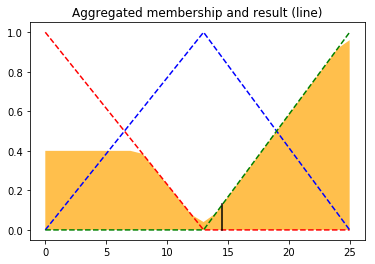

Tip to pay :14.553253692222391


In [13]:
# Aggregate all three output membership functions together by finding a complete Upper bounding values in each interval  
# to plot in graph as the max value in each inerval will be the peak value above which no shading will be there 
# in graph 

aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_mid, tip_activation_hi))   

#Defuzzification i.e; mapping back to original value in the range of [0,25] because membership function maps in [0,1]
predicted_tip = fuzz.defuzz(tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(tip, aggregated, predicted_tip)  # Returns the y- value i.e; participation
                                                                        # of predicted_tip in closed set tip where 
                                                                        #membership function is "Aggregated"

plt.plot(tip, tip_lo,'r', linestyle = '--')
plt.plot(tip, tip_mid,'b', linestyle = '--')
plt.plot(tip, tip_hi,'g', linestyle='--')

plt.fill_between(tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
plt.plot([predicted_tip, predicted_tip], [0, tip_activation], 'k', linewidth=1.5, alpha=1)  # For plotting tip line
plt.title('Aggregated membership and result (line)')

plt.show()
print("Tip to pay :"+ str(predicted_tip))

In [3]:
fuzz.trimf?